# Bode plot for inverting OPA [gain 1] and [gain 10]

In [3]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


# Gain 2

### Read DataFrames

In [4]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_errors.csv")

### Convert to arrays of uncertainties

In [5]:
index=[28,29]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [6]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))


### Canvas

In [7]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [8]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [9]:
#function = "1/[0]*(1-1/[0]*exp(x/[0]))"



In [11]:

R1= 987
R2= 990
R3= 9700
G2 = -R2/R1
G11 = -R3/R1

R1_err = 1/100*R1 + 4*1
R2_err = 1/100*R2 + 4*1
R3_err = 1/100*R3 + 4*1
G2_err = np.sqrt((R2_err/R1)**2+(R1_err*R2/(R1**2))**2)
G11_err = np.sqrt((R3_err/R1)**2+(R1_err*R3/(R1**2))**2)
print(G2,'+-',G2_err)
print(G11,'+-',G11_err)
print(R1,'+-',R1_err)
print(R2,'+-',R2_err)
print(R3,'+-',R3_err)

G2_graph =1.9565217391304348 
G2_graph_err =0.04900999445669284



-1.0030395136778116 +- 0.019925194973669996
-9.827760891590678 +- 0.17188622470915876
987 +- 13.870000000000001
990 +- 13.9
9700 +- 101.0


In [12]:
A_v2_d = 20*umath.log10(R2/R1)
#f_l2 = 1/np.sqrt(2)*(1+R2/R1)
print('guadagno calcolato = ',A_v2_d)
#print('freq taglio = ',f_l2)

guadagno calcolato =  0.026360838558264384


In [13]:
function = "[1]*(1/sqrt(1+(x/[0])**2))"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f.SetParName(0, "f_l2")
fit_f.SetParName(1, "Gain2")
fit_f.SetParameter(0, 10**6)
fit_f.SetParameter(1, A_v2_d)

#fit_f.SetParLimits(1,A_v2_d-1,A_v2_d+1)
#fit_f.SetParLimits(0,1e+05,1e+07)

In [14]:

fit_f.SetLineColor(4)

### Draw

 FCN=1314.18 FROM MINOS     STATUS=SUCCESSFUL      8 CALLS         526 TOTAL
                     EDM=1.78428e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  f_l2         1.40902e+10   1.41421e+00   0.00000e+00  -7.10677e-16
   2  Gain2       -1.72335e+00   8.12585e-02   8.12585e-02   0.00000e+00


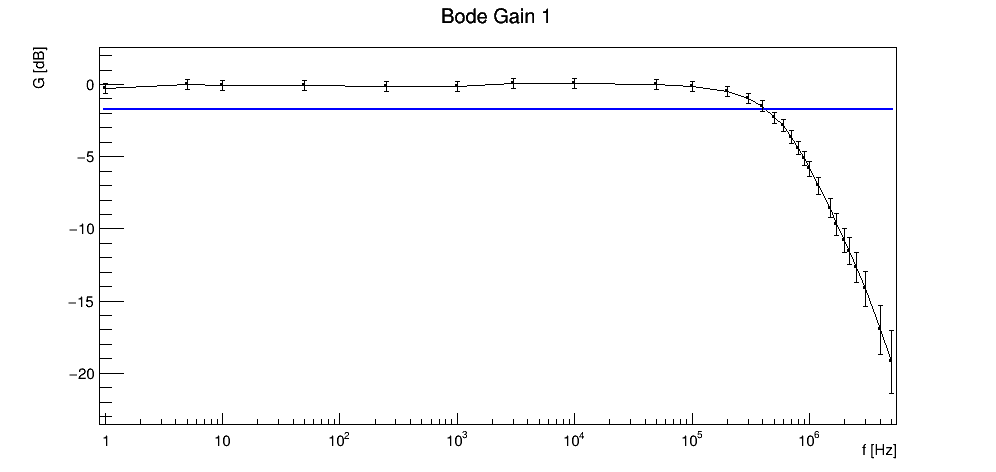

In [15]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f, "MSE")

In [16]:
###prova scipy
db_gains_arr

[-0.2924818301746463+/-0.3310148529151779,
 0.0+/-0.3412139702063196,
 -0.05928957927478011+/-0.3353970664081265,
 -0.06052909260375669+/-0.34240910453438794,
 -0.12148295424386304+/-0.343625287188438,
 -0.12148295424386304+/-0.343625287188438,
 0.060953861640106494+/-0.3448120638832389,
 0.060953861640106494+/-0.3448120638832389,
 0.0+/-0.34601980077260586,
 -0.12320617409636893+/-0.34850013510055977,
 -0.48947538766401166+/-0.3464319472043844,
 -0.9484929985627623+/-0.3589432067983344,
 -1.5001634312045329+/-0.3721757916949141,
 -2.3026966622851104+/-0.3909731170399691,
 -2.863271134289981+/-0.4075762466812107,
 -3.641632454897374+/-0.4331395453383549,
 -4.39740367268537+/-0.4609847677914652,
 -5.117356738115747+/-0.4905230739352366,
 -5.821989883130677+/-0.5189604100568161,
 -7.008269907450318+/-0.579971440983809,
 -8.566452753315168+/-0.6717657095304399,
 -9.69532892819127+/-0.7491705585010793,
 -10.79902956310887+/-0.8528286035937923,
 -11.539512967490001+/-0.9168773586516136,
 -1

In [17]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = [i.n for i in db_gains_arr]
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors = [i.s for i in db_gains_arr]


H(s) = TransferFunctionContinuous(
array([-566717.32522796]),
array([1.00e+00, 5.65e+05]),
dt: None
)


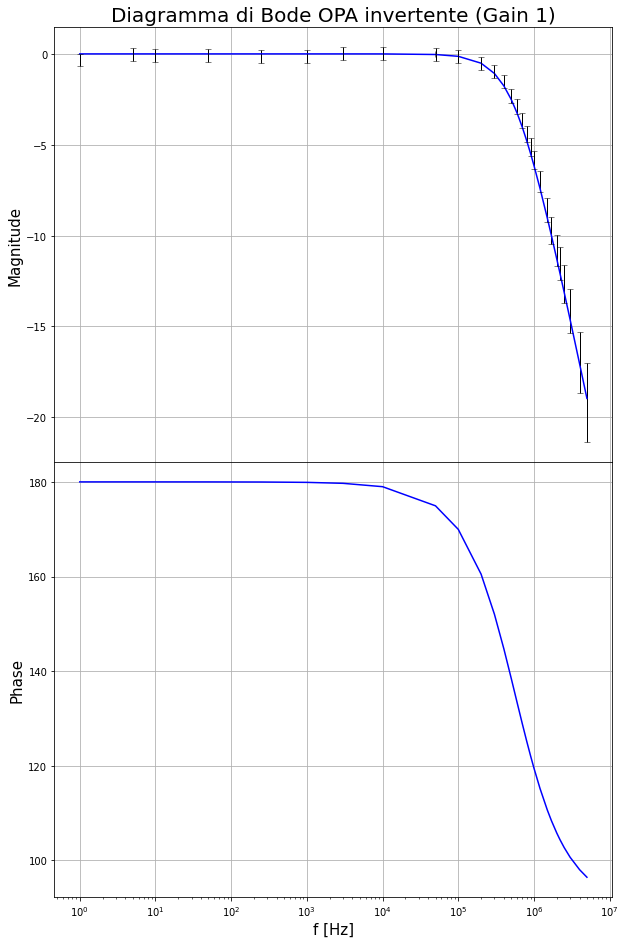

In [18]:

G2=-R2/R1
fH2=5.65*10**5
fH2_err = 0.3*10**5
a=1/fH2
b=0
c=0


num = np.array([G2]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data_n['f']) #df_data_n['f'] 

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Diagramma di Bode OPA invertente (Gain 1)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, phase,color = "blue")
plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain1(mag+phase).pdf")
plt.show()


In [19]:
((mag-db_gain_Arr)**2).sum()

2.32159312555081

In [20]:
((mag-db_gain_Arr)**2).sum()

2.32159312555081

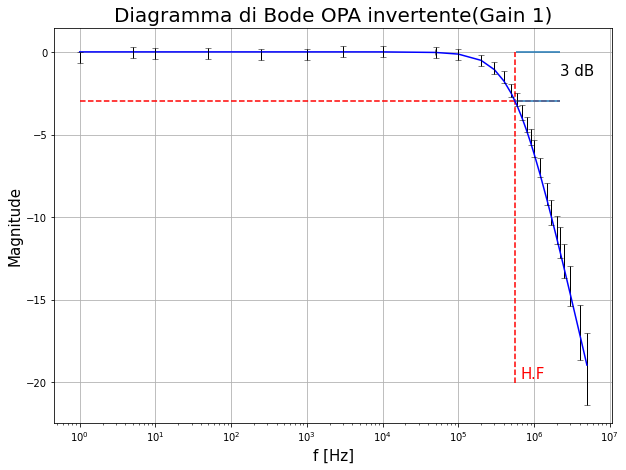

In [21]:
plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Diagramma di Bode OPA invertente(Gain 1)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.vlines(fH2, mag[26]-3,  mag[0], linestyles="--", color = "red")
plt.hlines(mag[0]-3,f[0],f[23], linestyles="--", color = "red")
plt.text(fH2+100000, mag[26]-2, 'H.F', verticalalignment='top', horizontalalignment='left', color='red', fontsize=15)

max_in = mag[0]
max_rt=mag[0]-3
plt.hlines(max_in, fH2+10000, f[23])
plt.hlines(max_rt, fH2+10000, f[23])

plt.text(f[23], max_rt + abs(max_rt - max_in) - 0.7, '3 dB',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain1(mag).pdf")






In [22]:
###Calcolo band width
mag_BW = mag - mag[27]
mag
#f[18]
#print(np.where(mag_BW>(mag_BW[0]/umath.sqrt(2)-0.5) and mag_BW>(mag_BW[0]/umath.sqrt(2)+0.5) ))
#print(np.where(mag_BW==45.60653209996797))
#f[np.where(mag_BW==45.60653209996797)]

array([ 2.63608385e-02,  2.63608382e-02,  2.63608372e-02,  2.63608045e-02,
        2.63599883e-02,  2.63472339e-02,  2.62383984e-02,  2.50005865e-02,
       -7.51830056e-03, -1.07598268e-01, -4.86335740e-01, -1.05229178e+00,
       -1.73806487e+00, -2.48550986e+00, -3.25280683e+00, -4.01336312e+00,
       -4.75187510e+00, -5.46047505e+00, -6.13585893e+00, -7.38588409e+00,
       -9.03069160e+00, -9.99667187e+00, -1.12867285e+01, -1.20585149e+01,
       -1.31078116e+01, -1.46264682e+01, -1.70596655e+01, -1.89671743e+01])

In [23]:
-0.15804521-3
#(f[51]+f[52])/2

-3.15804521

In [24]:
###how to get bode plot

#num = np.array([1]) #zeros(increase 20 db)
#den = np.array([1/10**6,1]) #poles (decreases 20 db)
#H = signal.TransferFunction(num, den)
#print ('H(s) =', H)
#f, mag, phase = signal.bode(H)
#plt.figure()
#plt.semilogx(f, mag) # Magnitude Plot
#plt.grid()
#plt.figure()
#plt.semilogx(f, phase) # Phase plot
#plt.show()
#len(f)

# Gain 10

In [25]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_errors.csv")
len(df_data)

29

### Convert to arrays of uncertainties

In [26]:
index=[27,28]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [27]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))


### Canvas

In [28]:
canvas = ROOT.TCanvas("c2", "bode gain 10", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [29]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 10")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit

In [30]:
A_v11_d = 20*umath.log10(1+R3/R1)
f_l11 = 1/np.sqrt(2)*(1+R3/R1)
print('guadagno calcolato = ',A_v11_d)
print('freq taglio = ',f_l11)

guadagno calcolato =  20.690773134416144
freq taglio =  7.656383151510266


In [31]:
function = "[1]*(1/sqrt(1+(x/[0])**2))"
fit_f11 = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f11.SetParName(0, "f_l")
fit_f11.SetParName(1, "Gain")
fit_f.SetParameter(0, 10**5)
fit_f.SetParameter(1, A_v11_d)

fit_f.SetParLimits(1,A_v11_d-2,A_v11_d+2)
fit_f.SetParLimits(1,1,10**3)

### Draw Graph

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=166.559 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         380 TOTAL
                     EDM=1.44406e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  f_l          1.33020e+05   5.91666e+03   2.27613e+01  -6.75316e-10
   2  Gain         1.98283e+01   1.49841e-01   1.49841e-01  -4.99078e-05


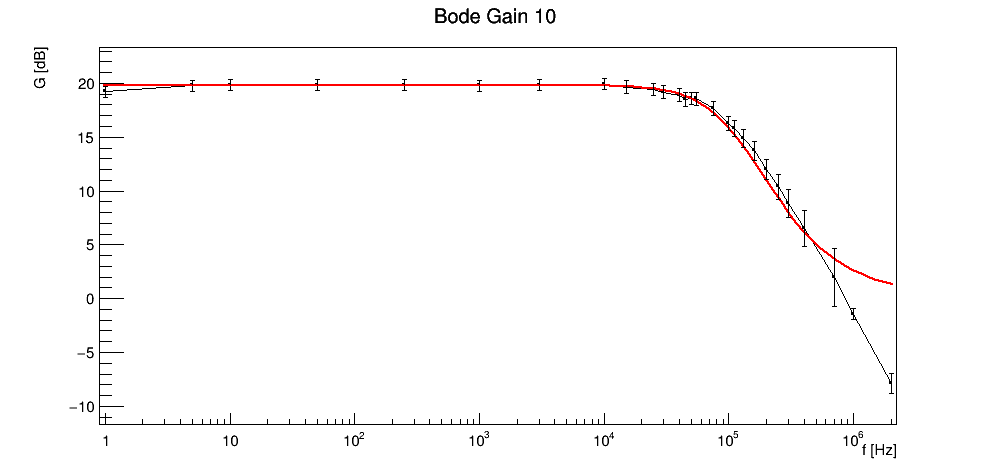

In [32]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f11, "MSE")


In [33]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log10(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors =[0.49476812680433546,
 0.5140839532243918,
 0.5161766453566071,
 0.5161766453566071,
 0.5161766453566071,
 0.5140839532243918,
 0.5161766453566071,
 0.5183135430618956,
 0.5902223277479106,
 0.5722443540890254,
 0.6254940844308975,
 0.6034386533470738,
 0.6305511142668727,
 0.5537228015136225,
 0.6054252390733152,
 0.6505261427316407,
 0.6565350182110768,
 0.7298167274022264,
 0.8141018776433374,
 0.8943701715235557,
 0.9354989439512417,
 1.2036580608023484,
 1.2876413768877326,
 1.644168540308734,
 2.73562945708666,
 0.5320467589458894,
 0.9184136827732226]


# 6.714495099740892,
# 33.34952100333063
-R3/R1

-9.827760891590678

H(s) = TransferFunctionContinuous(
array([-837505.]),
array([1.00e+00, 8.35e+04]),
dt: None
)


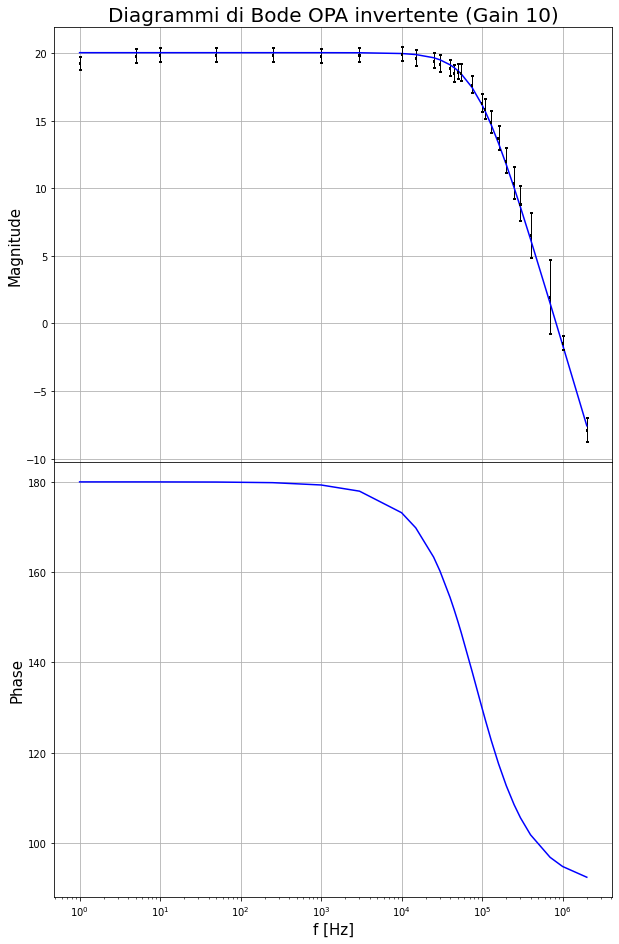

83500.0

In [34]:
#k=9.8**18
#a=0.4*10**5
#b=1.2*10**5
#c=3.5*10**5

G11=-9.83-0.2
G11_err = 0.1
fH11=8.35*10**4
fH11_err = 0.45*10**4
a=1/fH11
b=0
c=0

num = np.array([G11-b]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,a*b+c*a+c*b,a*b*c]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f_11, mag_11, phase_11 = H.bode(df_data_n['f']) #

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Diagrammi di Bode OPA invertente (Gain 10)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f_11, phase_11,color = "blue")
plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain10(mag+phase).pdf")

plt.show()


fH11

In [35]:
((mag_11-db_gain_Arr)**2).sum()

2.292648698929919

In [36]:
((mag_11-db_gain_Arr)**2).sum()

2.292648698929919

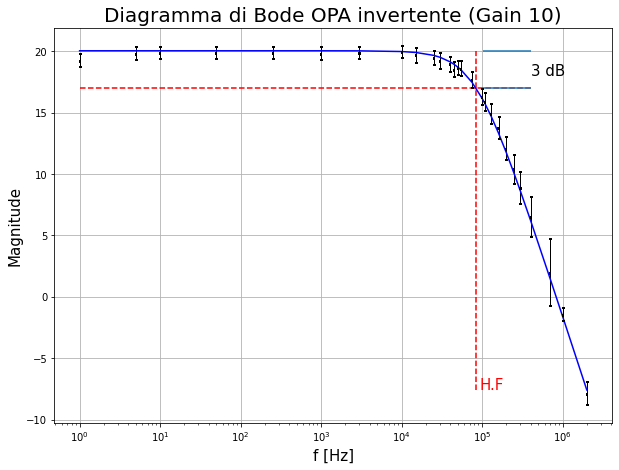

In [37]:
plt.figure(figsize=((10,16)))



ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Diagramma di Bode OPA invertente (Gain 10)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar(df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors , fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.vlines(fH11, mag_11[len(mag_11)-1],  mag_11[0], linestyles="--", color = "red")
plt.hlines(mag_11[0]-3,f_11[0],f_11[23], linestyles="--", color = "red")

plt.text(fH11+10000, mag_11[len(mag_11)-1]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)

max_in = mag_11[0]
max_rt=mag_11[0]-3
plt.hlines(max_in, fH11+20000, f_11[23])
plt.hlines(max_rt, fH11+20000, f_11[23])

plt.text(f_11[23], max_rt + abs(max_rt - max_in) - 1, '3 dB',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain10(mag).pdf")

plt.show()



In [38]:

#f, mag, phase = H.bode() 
mag_BW = mag_11 - mag_11[26]
mag_11

array([20.02601866, 20.02601864, 20.0260186 , 20.0260171 , 20.02597973,
       20.02539582, 20.02041627, 19.96417213, 19.88808229, 19.65318399,
       19.49875939, 19.12879989, 18.91865029, 18.69521665, 18.46094264,
       17.45699069, 16.16235397, 15.65572886, 14.68081463, 13.33127058,
       11.74133453, 10.04163452,  8.59327345,  6.23330518,  1.49642678,
       -1.57042685, -7.56841518])

In [39]:
45.74330349-3
#mag_11[43]
#f_11[43]

42.74330349

In [40]:
mag_BW[24]
print(np.where(mag_BW==84.75575792647965))
f[np.where(mag_BW==84.75575792647965)]
f_11[19]

(array([], dtype=int64),)


160000

In [41]:
700000
(f[24]+f[25])/2

2750000.0

In [42]:
###Control BW*Gain
BG2 = fH2*(G2)
BG2_err = np.sqrt((fH2_err*G2)**2+(fH2*G2_err)**2)
print(BG2, '+- ',BG2_err)

-566717.3252279636 +-  32128.11915339273


In [43]:
BG11 = fH11*(G11)
BG11_err = np.sqrt((fH11_err*G11)**2+(fH11*G11_err)**2)
print(BG11, '+- ',BG11_err)

-837505.0 +-  45900.87934887523


In [44]:
z_BG = abs(BG2-BG11)/np.sqrt(BG11_err**2 + BG2_err**2)
print(z_BG)


4.833100762364992


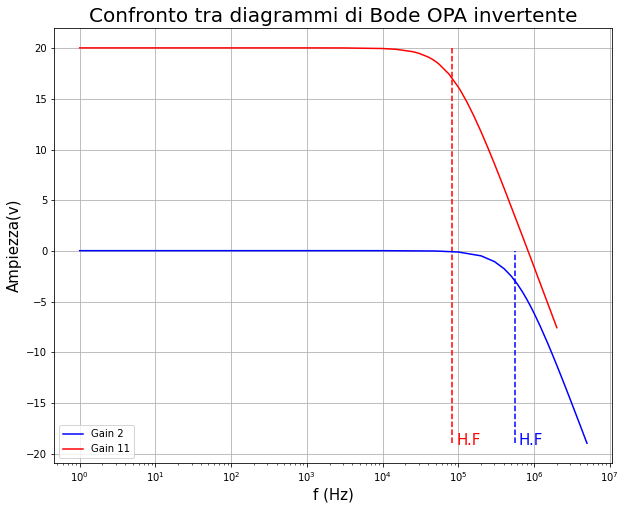

In [45]:
###plot gain 1 + gain 11
plt.figure(figsize=((10,8)))
plt.ylabel('Ampiezza(v)',fontsize=15)
plt.xlabel('f (Hz)',fontsize=15)
plt.semilogx(f, mag, label='Gain 2',color = "blue")
plt.semilogx(f_11, mag_11,label='Gain 11',color = "red")
plt.vlines(fH2, mag[len(mag)-1],  mag[0], linestyles="--", color = "blue")
plt.text(fH2+50000, mag[len(mag)-1]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='blue', fontsize=15)
plt.vlines(fH11, mag[len(mag)-1],  mag_11[0], linestyles="--", color = "red")
plt.text(fH11+10000, mag[len(mag)-1]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)
plt.grid()
plt.title('Confronto tra diagrammi di Bode OPA invertente',fontsize=20)

plt.legend(loc = "lower left")
plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain_comparison(mag).pdf")
plt.show()
